**Trabajo Práctico 2 - Matrices de Insumo-Producto**

**Consigna 1**

Para demostrar la convergencia de la suma inifinita partimos de la ecucación
$$
(I-A)^{-1} = I + A + A^{2} + \dots\ + A^{n} + \dots\
$$
que podemos reescribirla como
$$
(I-A)^{-1} = \sum_{i=0}^{∞}A^{i}
$$
Multiplicando a ambos lados por $(I-A)$ obtenemos
$$
I = (I-A)\sum_{i=0}^{∞}A^{i}
$$
Al ser (I-A) un término lineal, podemos reescribir
$$
I = \sum_{i=0}^{∞}(I-A)A^{i}
$$
Desarrollando la multiplicación obtenemos
$$
I = \sum_{i=0}^{∞}A^{i}-A^{i+1}
$$
Expandiendo la sumatoria obtenemos
$$
I = (I-A)+(A-A^{2})+(A^{2}-A^{3})+\dots+(A^{n-1}-A^{n})+(A^{n}-A^{n+1})
$$
Luego observamos que todos los términos intermedios se cancelan en la serie, y sólo quedan el primer término y el último término. Entonces, esto se reduce a:
$$
I = I - A^{n+1}
$$
Ahora si tomamos límite cuando $n \to ∞$ a ambos lados,
$$
\lim_{n \to \infty} I  = \lim_{n \to \infty} I - A^{n+1}
$$

lo cual solo se cumple si, $\lim_{n \to \infty} A^{n+1} = 0$

**Consigna 2**

Para graficar los dos vectores pedidos se utilizaron las funciones **elevarMatriz**, que calcula la potencia de A para cada exponente, y **crearVector**, que ubica la norma de las potencias de A en las posiciones del vector. Luego se realizó un gráfico de cada vector.

In [79]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.linalg import solve_triangular
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from funcionesTP2 import elevarMatriz, crearVector
A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])
vector1 = crearVector(A1)
A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])

vector2 = crearVector(A2)

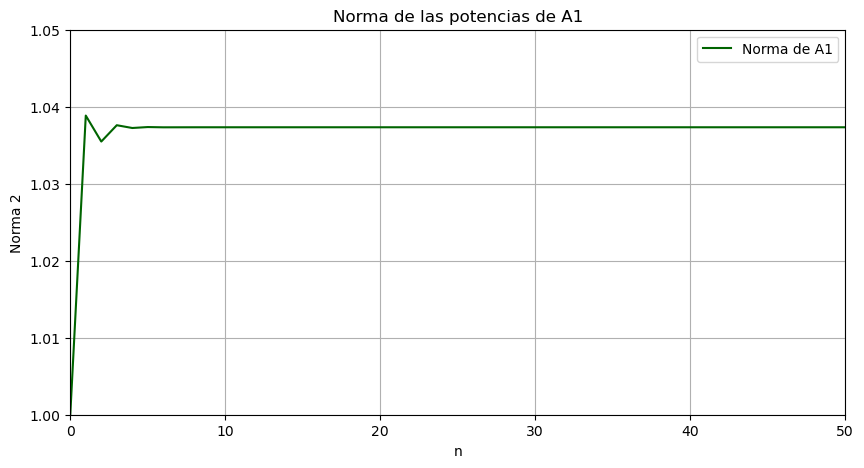

In [3]:
# Gráfico de la norma de A1
plt.figure(figsize=(10, 5))  
plt.plot(vector1, label='Norma de A1', color='darkgreen')
plt.title('Norma de las potencias de A1')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, 50)  
plt.ylim(1, 1.05)  
plt.grid()
plt.legend()
plt.show()

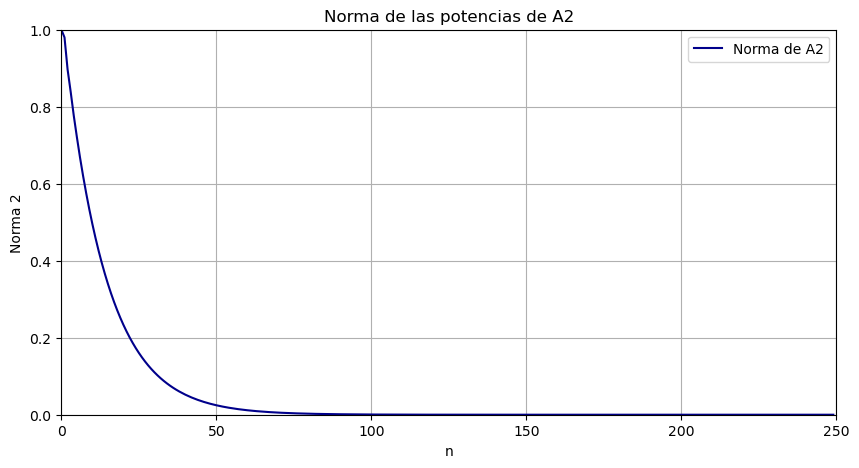

In [9]:
# Gráfico de la norma de A2
plt.figure(figsize=(10, 5))  
plt.plot(vector2, label='Norma de A2', color='darkblue')
plt.title('Norma de las potencias de A2')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, len(vector2))
plt.ylim(0, 1)  
plt.grid()
plt.legend()
plt.show()

Estos gráficos nos dan un indicio de que la serie de potencias de A2 converge mientras la de A1 no. Para A2 todas sus potencias tienen un valor menor que 1, lo que nos indica que todos sus autovalores son menores que 1 en módulo. Por lo tanto, las potencias de A disminuye a medida que su exponente aumenta y lleva a la convergencia de la serie de potencias.

**Consigna 3**

Para encontrar el mayor autovalor de las matrices A1 y A2 se utilizaron las funciones **metodoDeLaPotencia** y **obtenerAutovalorAproximado**. Se implementó el método Monte Cralo para calcular un promedio de los autovalores de 250 vectores distintos.

In [11]:
from funcionesTP2 import metodoDeLaPotencia, obtenerAutovalorAproximado, monteCarlo
promedio1, desvio_estandar1 = monteCarlo(A1)

promedio2, desvio_estandar2 = monteCarlo(A2)

tabla_resultados = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalor': [promedio1, promedio2],
    'Desviación Estándar': [desvio_estandar1, desvio_estandar2]
}

print(pd.DataFrame(tabla_resultados))

  Matriz  Promedio Autovalor  Desviación Estándar
0     A1            1.000000         0.000000e+00
1     A2            0.927651         2.365022e-16


**Consigna4**

a) Para calcular la serie de potencias $(I-A)^{-1}$ para A1 y A2 se utilizó la función **serieDePotencias**. Luego la graficamos.

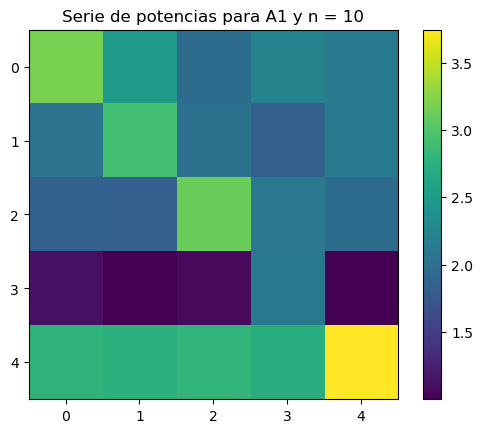

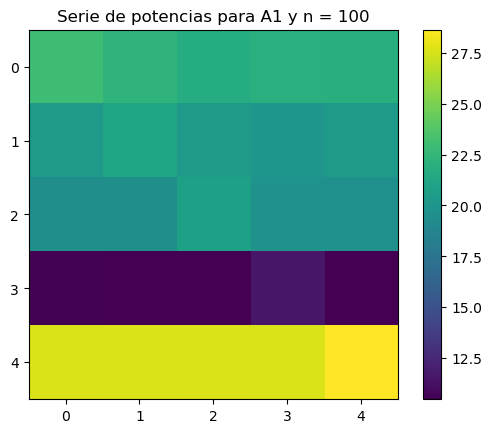

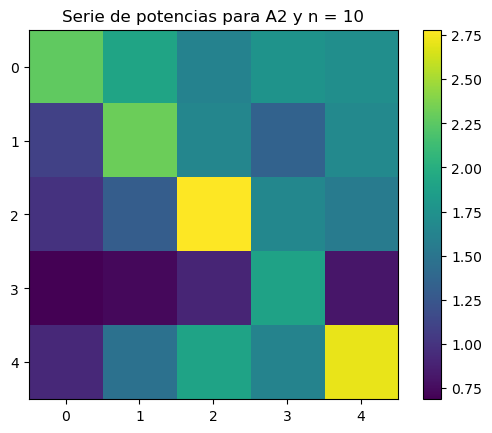

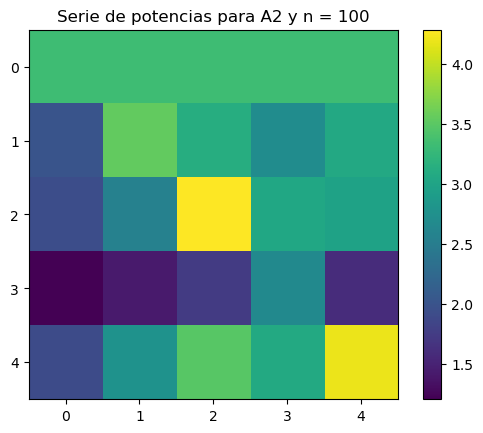

In [13]:
from funcionesTP2 import serieDePotencias

serie10_A1 = serieDePotencias(A1, 10)
serie100_A1 = serieDePotencias(A1, 100)
serie10_A2 = serieDePotencias(A2, 10)
serie100_A2 = serieDePotencias(A2, 100)

#Gráfico de la serie de potencias para A1 y n = 10 
plt.imshow(serie10_A1)
plt.title("Serie de potencias para A1 y n = 10")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A1 y n = 100 
plt.imshow(serie100_A1)
plt.title("Serie de potencias para A1 y n = 100")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A2 y n = 10 
plt.imshow(serie10_A2)
plt.title("Serie de potencias para A2 y n = 10")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A2 y n = 100 
plt.imshow(serie100_A2)
plt.title("Serie de potencias para A2 y n = 100")
plt.colorbar() 
plt.show()



*b*) ¿Hay convergencia para ambas matrices? Argumentar la respuesta. <br>Para analizar la convergencia de ambas matrices, observamos el comportamiento de sus series de potencias.<br>
En el caso de la matriz **A2**, los gráficos muestran una variación mínima entre los elementos a medida que avanzamos en las potencias. Esta estabilidad en los valores indica que, con cada potencia, los elementos de **A2**se estabilizan en valores muy similares, sugiriendo que la serie de potencias de la misma converge. <br>
Por otro lado, en el caso de **A1**, los gráficos muestran un cambio considerable en los elementos de la matriz a medida que avanzamos en la serie de potencias. Este comportamiento indica que los valores no se estabilizan, sino que siguen variando, lo cual sugiere que la serie de potencias de **A1** no converge. .

d) Como mencionamos en el inciso b), la convergencia existe para **A2**. Luego calculamos su error con la función crearVectorError y lo graficamos. 

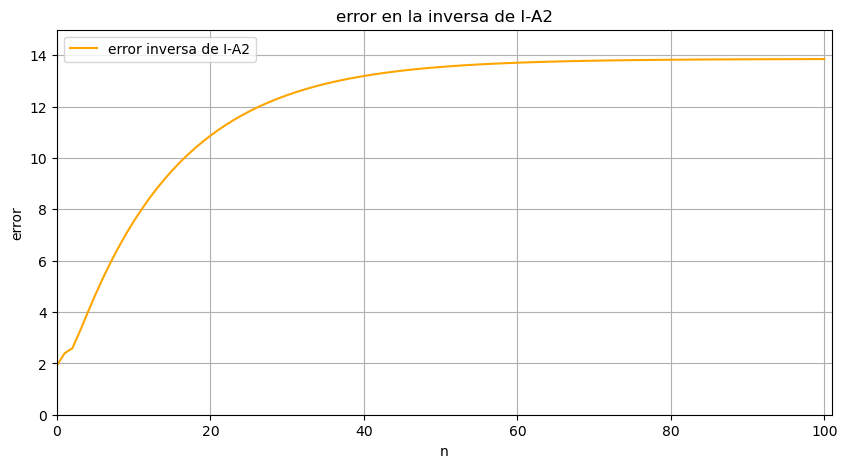

In [15]:
from funcionesTP2 import intercambiarfilas, calcularLU, inversaLU, crearVectorError
Id_menos_A2 = np.array([[0.832, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.927, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.689, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.86, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.743]])

L2, U2, P2 = calcularLU(Id_menos_A2)
inversa_Id_menos_A2 = inversaLU(L2, U2, P2)

e2_10 = crearVectorError(A2, inversa_Id_menos_A2, 10)
e2_100 = crearVectorError(A2, inversa_Id_menos_A2, 100)

plt.figure(figsize=(10, 5))
plt.plot(e2_100, label='error inversa de I-A2', color='orange')
plt.title('error en la inversa de I-A2')
plt.xlabel('n')
plt.ylabel('error')
plt.xlim(0, len(e2_100))
plt.ylim(0, 15)
plt.grid()
plt.legend()
plt.show()

**Consigna 5**

Para retomar las matrices insumo-producto de los paises Costa Rica y Nicaragua (asignados en el trabajo práctico número 1), volvimos a utilizar las funciones creadas en ese trabajo para generarlas. Luego, con la función **metodoDeLaPotencia** calculamos el mayor autovector de ambas y con **obtenerAutovalorAproximado** su autovalor.

In [17]:
from funcionesTP2 import generadorMatrizZ, produccionesPais, IdxP, AInsumoProducto
data = pd.read_excel('matrizlatina2011_compressed_0.xlsx',sheet_name=1)

In [18]:

ZCriCri = generadorMatrizZ(data,"CRI","CRI")
pCri = produccionesPais(data,"CRI")
IdPCri = IdxP(pCri)
L_Id_Cri, U_Id_Cri, P_Id_Cri =calcularLU(IdPCri)
IdCri_inv = inversaLU(L_Id_Cri, U_Id_Cri, P_Id_Cri)
ACriCri = AInsumoProducto(ZCriCri,IdCri_inv)
AvecCriCri = metodoDeLaPotencia(ACriCri, 50)
AvalCriCri = obtenerAutovalorAproximado(ACriCri, AvecCriCri)

ZNicNic = generadorMatrizZ(data,"NIC","NIC")
pNic = produccionesPais(data,"NIC")
IdPNic = IdxP(pNic)
L_Id_Nic, U_Id_Nic, P_Id_Nic =calcularLU(IdPNic)
IdNic_inv = inversaLU(L_Id_Nic, U_Id_Nic, P_Id_Nic)
ANicNic = AInsumoProducto(ZNicNic,IdNic_inv)
AvecNicNic = metodoDeLaPotencia(ANicNic,150)
AvalNicNic = obtenerAutovalorAproximado(ANicNic, AvecNicNic)

In [19]:
print("mayor autovalor Costa Rica:", AvalCriCri)
print("mayor autovalor Nicaragua:", AvalNicNic)

mayor autovalor Costa Rica: 0.2743348020268574
mayor autovalor Nicaragua: 0.26069619164879065


**Consigna 6**

a) Sea $z \in \mathbb{R}^{n}$, veamos que sucede con al multiplicar este con $E_n$:

$$E_nz = (I_n - \frac{1}{n}ee^t)z$$

Distribuimos $z$:

$(I_nz - \frac{1}{n}eetz)$ = $(z - \frac{1}{n}e(e^tz))$

Ver que $(e^tz)$, es producto escalar ya que $e^t$ es un vector fila en $\mathbb{R}^{n}$ donde todos sus elementos son 1s. Por ello este producto escalar es congurente con la suma de los componentes del vector $z$. Notamos,

$<e^t,z>$ = $\sum_{i=1}^{n} z_i $

Siguendo:

$(z - \frac{1}{n}e\sum_{i=1}^{n} z_i)$

Expresamos para simplificar: 

$(e\sum_{i=1}^{n} z_i) = \left(\begin{matrix} \sum_{i=1}^{n} z_i \\ \vdots \\ \sum_{i=1}^{n}z_i\end{matrix}\right)=S$ 

Quedando: 

$(z - \frac{S}{n})$

Luego, veamos que sucede al calcular el promedio del vector resultante

$\frac{1}{n}\sum_{j=1}^{n}(E_nz)$:

$\frac{1}{n}\sum_{j=1}^{n}(z -\frac{S}{n} )$ <br>
Distribuimos: 

$(\frac{1}{n}\sum_{j=1}^{n}z_j -\frac{1}{n}\sum_{j=1}^{n}\frac{S}{n})$

Y nos queda por un lado: 

$(\frac{1}{n}\sum_{j=1}^{n}z_j)$ el cual calcula el promedio del vector z, escrito anteriomente como S. <br>
Por el otro  $\frac{1}{n}\sum_{j=1}^{n}\frac{S}{n}$, como S no depende del indice j, queda como: 
$\frac{1}{n}n\frac{S}{n}$ <br>
Por ultimo: 
$$ \frac{S}{n} - \frac{1}{n}n\frac{S}{n} = \frac{S}{n} - \frac{S}{n} = 0$$

**Analicemos que sucede con** $E_nA$ <br>

Anteriomente, observamos que multiplicar un vector cualquiera en $\mathbb{R}^{n \times n}$ por la matriz $E_n$ tiene el efecto de restarle a cada componente su promedio, es decir, centra el vector alrededor de cero.
De este modo si multiplicamos una matriz $A \in \mathbb{R}^{n}$ por $E_n$,está centralizara cada vector columna de A, dandonos así una versión centralizada de la matriz $A$.



b) Consideramos la base de vectores $\{ e, d_2, \dots, d_n \}$ de $\mathbb{R}^{n}$ donde $\{d_2, \dots, d_n \}$ es una base de $<e>^\perp$.

Observemos que sucede al multiplicar $E_ne$:

$E_ne$=$(I_n-\frac{1}{n}ee^t)e$

Distribuimos:

$(I_ne-\frac{1}{n}ee^te) = (e-\frac{1}{n}ee^te)$

Notar que: $e^te = n$ ya que es la multiplicación entre un vector fila y columna donde ambos vectores tienen 1s como elementos.

Nos queda como:

$$(e-\frac{1}{n}en) = (e-e) = 0$$

Ver que esto cumple con $E_ne=λe$ con $λ=0$.
Podemos decir que $e$ es un autovector asociado al autovalor 0 de la matriz $E_n$, de multiplicidad artimetica igual a 1.

Ahora vemos que pasa con multiplicar un vector cualquiera de la base $\{d_2, \dots, d_n \}$ con la matriz $E_n$:

$E_nd_n=(I_n-\frac{1}{n}ee^t)d_n=(d_n-\frac{1}{n}ee^td_n)$

La multipicación entre $e^td_n = 0$ ya que le vector $d_n \in <e>^\perp$.

Entonces:
$$E_nd_n=(d_n-0)=d_n$$

Contemplar que la multiplicación corresponde con $E_nd_n=λd_n$ con $λ=1$.Luego concluimos que $d_n$ es un autovector asociado al autovalor 1 de la matriz $E_n$.En cuanto a su multiplicidad aritmetica esta sería $n-1$, pues la base de vectores $\{d_2, \dots, d_n \}$ es de dimensión $n-1$.

En cuanto la imagen y el nucleo de En.<br>

El $Nu(E_n)=e$ pues es el unico vector que cumple $E_ne=0$ (demostrado anteriormente en cuanto autovectores).

En cuanto a la imagen de este, sabemos que la imagen de una matriz esta compuesta por todo los posibles vectores que se obtienen al multiplicar la matriz por un vector cualquiera. Osea se tiene que cumplir que:

$∀{w}\in\mathbb{R}^{n}, \exists{v\in\mathbb{R}^{n}}/ w=Av$

Por lo que ya trabajamos con una base vectores, la cual cumple con lo mencionado, la cual corresponde a la base generada por $<e>^\perp$.
Por ende, la base $\{d_2, \dots, d_n \}$, es la $Im(E_n)$.

Además el $Nu(E_n)=<e>$ y  la $Im(E_n)=<e>^\perp$ cumplen con lo establecido por el Teorema de la Dimensión tal que:

$$dim(E_n)= dim(Nu(E_n)) + dim(Im(E_n))$$

Donde la $dim(E_n)=n$, $dim(Nu(E_n))=1$ y la $dim(Im(E_n))=n-1$.

c) Una matriz P se dice de proyección ortogonal si $Nu(P)\perp Im(P)=0$. Osea que $\forall{u}\in Nu(P)$ y $\forall{v}\in Im(P)$  su  $<u,v>=0$.

Sabemos que el nucleo de En está formado por $<e>$ y su imagen por la base $\{d_2, \dots, d_n \}$ la cual pertenece a $<e>^\perp$.
Inmediatamente sabemos que el para todos aquellos vectores pertenecientes a $Nu(E_n)$ o $Im(E_n)$, su producto escalar siempre dara 0.

Pues, $Nu(E_n)=<e>$ y $Im(E_n)=<e>^\perp$ donde $\forall{v}\in<e>^\perp, u\in<e> \leftrightarrow <v,u>=0$.

d)

$(I) E_n$ es una matriz ortogonal (Falso).

Si $E_n$ es una matriz ortogonal entonces $EnEn^t=En^tEn=I_n$ .

Comprobemoslo:

$EnEn^t=(I_n-\frac{1}{n}ee^t)(I_n-\frac{1}{n}ee^t)$
Distribuimos:

$(I_n-\frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n^2}ee^tee^t)$

donde $e^te=n$.

Entonces nos queda:

$(I_n-\frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n}ee^t)=(I_n-\frac{1}{n}ee^t)$

Pero $E_nE_n^t \neq I_n$.

$(II) E_n$ es una matriz singular (Verdadero).

Si $E_n$ es singular, su $Nu(E_n)\neq0$.
Y como comprobamos anteriormente en el item b), el $Nu(E_n)=<e>$.


$(III) E_n$ es definida positiva (Falso).

Veamos si $E_n$ cumple con la definición de definida positiva tal que $v^tE_nv>0$.

Empezemos:

$v^tE_nv=v^t(I_n-\frac{1}{n}ee^t)v$

Distribuimos:

$(v^tI_n-\frac{1}{n}v^tee^t)v=(v^tv-\frac{1}{n}v^tee^tv)$

Reescribimos, $v^tv=\|v\|^2_2$ y a $v^te=(e^tv)^t$:


$\left( \| v \|_2^2 - \frac{1}{n}(e^T v)^T (e^tv) \right)$

Notamos que, $(e^T v)^T (e^tv)=\|ev \|_2^2= \|e \|_2^2\|v \|_2^2$ y como e es un vector de tamaño n de solo 1s,$\|e \|_2^2=1$.

$\left( \| v \|_2^2 - \frac{1}{n} \| e \|_2^2 \| v \|_2^2 \right)$=$\left( \| v \|_2^2 - \frac{1}{n}n \| v \|_2^2 \right)$

Por ultimo queda,

$\left( \| v \|_2^2 - \| v \|_2^2 \right)=0 \not> 0$

$(IV)Tr(E_n)=n-1$ (Verdadero).

Calculemos la $Tr(E_n)$:

$Tr(E_n)=Tr(I_n) - Tr(\frac{1}{n}ee^t)$

Donde $Tr(I_n)=n$ y veamos más a fondo $tr(\frac{1}{n}ee^t)$

La matriz generada por $(\frac{1}{n}ee^t)$ se ve de la forma:

$(\frac{1}{n}ee^t)=\begin{pmatrix}
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n} \\
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n}
\end{pmatrix}
$

Por ende, la $tr(\frac{1}{n}ee^t)=\sum_{i=1}^{n}\frac{1}{n}$ y la \sum_{i=1}^{n}\frac{1}{n}$ converge a 1.

Finalmente,

$Tr(E_n)=Tr(I_n) - Tr(\frac{1}{n}ee^t)= n-1$

**Consigna 7**


Para realizar el análisis en componentes principales, primero utilizaremos las función del trabajo práctico número 1 para obtener la matriz $A^{rr}$ (matriz de coeficientes tecnicos intrarregional) de Costa Rica. La llamamos *ACriCri*.

Luego, calculamos la matriz de covarianzas *C*.

In [23]:
I40 = np.eye(40)
v40 = np.ones(40)
E_40 = I40 - 1/40*(np.outer(v40,v40))

ACriCri_normalizada = np.dot(E_40, ACriCri)

C = np.dot(ACriCri_normalizada.T, ACriCri_normalizada) / 39

print(C)

[[1.64673935e-04 1.82135355e-04 0.00000000e+00 ... 1.39468911e-04
  5.96285721e-05 9.02354489e-05]
 [1.82135355e-04 5.15081665e-04 0.00000000e+00 ... 8.91389389e-05
  3.40812253e-05 7.58220819e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.39468911e-04 8.91389389e-05 0.00000000e+00 ... 1.02938692e-03
  3.07049595e-04 3.72516979e-04]
 [5.96285721e-05 3.40812253e-05 0.00000000e+00 ... 3.07049595e-04
  2.15662480e-04 2.05484162e-04]
 [9.02354489e-05 7.58220819e-05 0.00000000e+00 ... 3.72516979e-04
  2.05484162e-04 2.23598104e-04]]


Posteriormente, obtenemos una aproximación de los dos primeros autovalores utilizando el método de la potencia. Para ello, implementamos una nueva función llamada **metodo_de_la_potencia**. Esto se debe a que ya no utilizamos el método de Monte Carlo, sino un criterio de parada. A diferencia de la técnica de Monte Carlo, en este caso aplicamos un criterio de convergencia específico: calculamos la norma 2 de la diferencia entre los últimos dos autovectores obtenidos. Si esta norma es menor que un valor de tolerancia, $\epsilon$ , consideramos que el método ha convergido y detenemos la búsqueda del autovalor.

In [25]:
from funcionesTP2 import metodo_de_la_potencia
v1, lambda1 = metodo_de_la_potencia(C)
print("Primer autovalor:", lambda1)
print("Primer autovector:", v1)

C_prima = C - lambda1 * np.outer(v1, v1)
v2, lambda2 = metodo_de_la_potencia(C_prima)
print("Segundo autovalor:", lambda2)
print("Segundo autovector:", v2)

Primer autovalor: 0.01567695684430834
Primer autovector: [0.06206739 0.02248714 0.         0.08322944 0.53969407 0.25809074
 0.46609364 0.33800245 0.0221903  0.06383101 0.02824322 0.04238905
 0.05382216 0.5041041  0.02562079 0.00783983 0.0182851  0.04823808
 0.05103316 0.03983039 0.03454626 0.02687569 0.02687569 0.02555451
 0.02611424 0.02748166 0.02611424 0.03920981 0.01994989 0.04473059
 0.         0.02991103 0.0305711  0.05077857 0.00866414 0.03822455
 0.07333328 0.06578537 0.03050403 0.04086483]
Segundo autovalor: 0.008726070228833037
Segundo autovector: [ 0.04814394  0.05286174  0.          0.35712523 -0.18207379 -0.00172511
 -0.01446457 -0.07127394  0.1002675   0.30196101  0.12560178  0.13291809
  0.16618884 -0.18205424  0.13344191  0.03753007  0.07759347  0.204183
  0.22243527  0.13232452  0.1795291   0.10897859  0.10897859  0.11110218
  0.11374754  0.12174863  0.11374754  0.17929289  0.09329557  0.17862116
  0.          0.14323497  0.06870034  0.22334132  0.09165041  0.15630064

**Consigna 8**

In [27]:
from funcionesTP2 import proyectar_datos
ACriCri_proyectada = proyectar_datos(ACriCri, v1, v2)
print(ACriCri_proyectada)

[[ 7.58925977e-01 -1.72584178e-01]
 [ 1.33372940e-02 -1.61211437e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.45648631e-03  8.25275092e-03]
 [ 4.16162230e-02 -4.00239405e-03]
 [ 2.17381911e-02  1.07105186e-03]
 [ 3.87461915e-02  2.93437224e-03]
 [ 3.50730699e-02  4.98032282e-03]
 [ 9.90347704e-04  3.68456741e-03]
 [ 8.97726395e-03  4.24681285e-02]
 [ 2.41912991e-03  8.46220453e-03]
 [ 1.29696510e-03  3.65405590e-03]
 [ 3.57981741e-05  1.01862336e-04]
 [ 2.34349756e-02 -1.60026235e-03]
 [ 1.85088999e-02  3.95033558e-02]
 [ 1.79565492e-02  3.01711002e-02]
 [ 3.18442941e-02  3.59403071e-02]
 [ 7.47328797e-03  2.57109002e-02]
 [ 5.69261978e-05  1.10167398e-04]
 [ 1.66062219e-02  3.74087830e-02]
 [ 6.88343911e-03  3.20905558e-02]
 [ 2.88908950e-04  1.16000680e-03]
 [ 1.66703375e-03  5.42508691e-03]
 [ 1.84617901e-02  1.72381712e-02]
 [ 2.82651829e-03  5.53105590e-03]
 [ 7.77715235e-04  3.40675866e-03]
 [ 5.78363736e-03  2.46383470e-02]
 [ 2.50751561e-05  1.10475914e-04]
 [ 4.14152497e-04  1

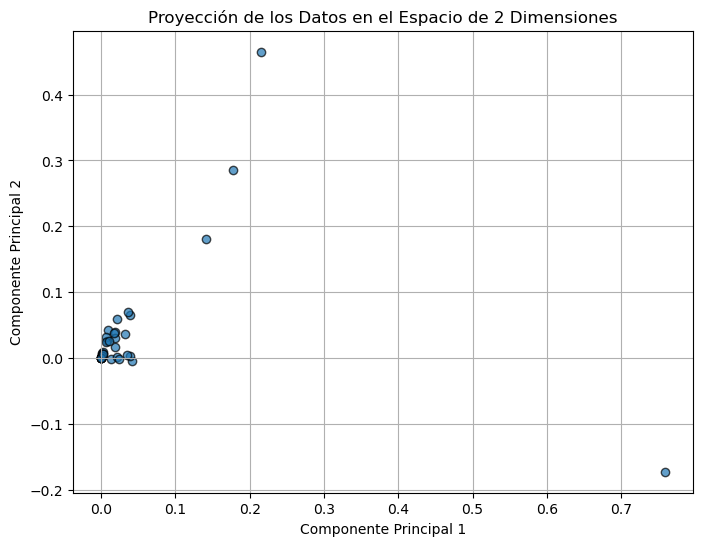

In [29]:
from funcionesTP2 import graficar_proyeccion 
graficar_proyeccion(ACriCri_proyectada)

Sin embargo, no se pueden identificar dos clusters. La gran mayoría de los datos se encuentra agrupados entre el 0 y el 0.1. Luego, realizamos en mismo procedimiento para la matriz de Nicaragua. 

In [31]:
ANicNic_normalizada = np.dot(E_40, ANicNic)

CN = np.dot(ANicNic_normalizada.T, ANicNic_normalizada) / 39

In [33]:
v1N, lambda1N = metodo_de_la_potencia(CN)
print("Primer autovalor:", lambda1N)
print("Primer autovector:", v1N)


CN_prima = CN - lambda1N * np.outer(v1N, v1N)
v2N, lambda2N = metodo_de_la_potencia(CN_prima)
print("Segundo autovalor:", lambda2N)
print("Segundo autovector:", v2N)

Primer autovalor: 0.017967824765533616
Primer autovector: [ 1.02103635e-01  1.91478639e-02  0.00000000e+00  6.54205798e-03
  4.97041141e-01  4.91643273e-01  3.62045432e-01  2.38073371e-01
  1.21259112e-02  4.16474378e-01  2.37262575e-03  1.18292652e-02
  2.31913380e-03  3.67832067e-01  1.14166709e-02  1.05256851e-03
  2.40382513e-02  2.41173982e-02  1.98541502e-02  2.03570036e-02
  4.78621076e-03  1.44242295e-02  6.54205797e-03  1.40632941e-02
  5.74938804e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24143911e-02
  9.11137230e-03  6.63417718e-03 -3.92611958e-05  1.69357809e-02
  6.53360969e-04  7.88532726e-03  1.90925140e-03  1.89451988e-02]
Segundo autovalor: 0.0042348543582386095
Segundo autovector: [ 0.07361167  0.1633054   0.          0.13451474 -0.07774123 -0.06464456
  0.01196068  0.12141281  0.2083269  -0.04309015  0.0634929   0.08539417
  0.12091793 -0.02896105  0.19250402  0.02623242  0.28031676  0.27385484
  0.2633221

In [35]:
ANicNic_proyectada = proyectar_datos(ANicNic, v1N, v2N)
print(ANicNic_proyectada)

[[ 8.41006494e-01 -4.58138274e-02]
 [ 4.10838108e-02  1.01149072e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.68487417e-03  2.21816916e-02]
 [ 2.26126331e-02  1.51453123e-02]
 [ 2.63789219e-02  2.45497044e-03]
 [ 9.37655674e-03  1.77670474e-02]
 [ 3.56296136e-02  3.08715963e-02]
 [ 1.50438168e-03  1.05834768e-02]
 [ 3.31983549e-05  6.60224188e-05]
 [ 1.16128455e-03  4.69602680e-03]
 [ 1.99400035e-03  2.41422563e-02]
 [ 1.34813780e-04  1.83227478e-03]
 [ 4.14253750e-02  2.06792901e-02]
 [ 4.89263710e-03  1.31656403e-02]
 [ 2.07731976e-02  1.59592090e-01]
 [ 5.47148945e-03  3.34224500e-02]
 [ 7.76523617e-04  5.00093904e-03]
 [ 1.10870868e-03  3.33851864e-03]
 [ 6.69181195e-03  2.74485856e-02]
 [ 3.37274253e-03  5.07361352e-02]
 [ 1.89554045e-03  2.31231632e-02]
 [ 8.05051295e-04  7.44547250e-03]
 [ 2.86819730e-03  2.47608608e-02]
 [ 8.59992632e-04  9.40693953e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0

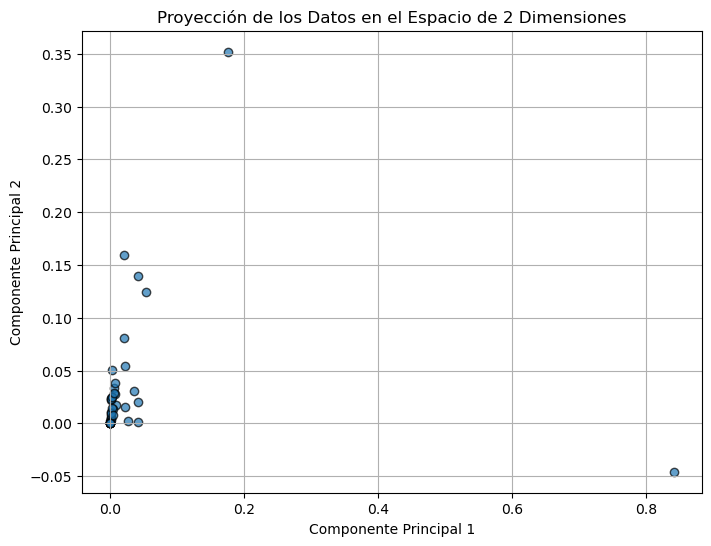

In [37]:
graficar_proyeccion(ANicNic_proyectada)

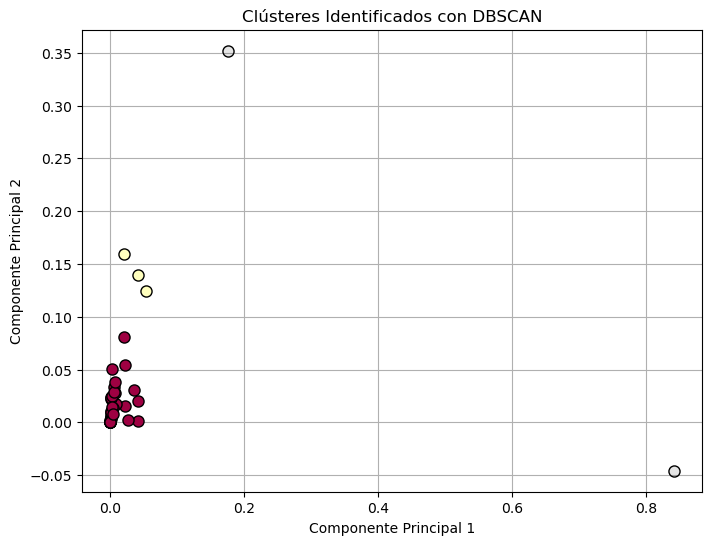

In [39]:
from sklearn.cluster import DBSCAN

# Parámetros de DBSCAN
epsilon = 0.05  # Distancia máxima entre dos puntos para que se consideren vecinos
min_samples = 3  # Número mínimo de puntos para formar un clúster

# Ejecutar DBSCAN en los datos proyectados
clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(ANicNic_proyectada)
labels = clustering.labels_

# Gráfico de los resultados de clustering
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color para ruido (puntos que no pertenecen a ningún clúster)
        col = [0, 0, 0, 0.1]

    class_member_mask = (labels == k)
    xy = ANicNic_proyectada[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Clústeres Identificados con DBSCAN')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

**Consigna 9**

Sea la matriz $H=A(I-A)^{-1}$ , por lo visto en el punto 1), podemos reescribir a la matriz $(I-A)^{-1}$ como:

$$(I-A)^{-1}=\sum_{i=0}^{∞}A^i$$

Quedandonos:

$$H=A\sum_{i=0}^{∞}A^i$$

Observando mas a fondo el comportamiento de la sumatoria con $A$:

$A\sum_{i=0}^{∞}A^i=A(I+A+A^2+\dots+A^n)$

Distribuimos:

$A\sum_{i=0}^{∞}A^i=(A+A^2+A^3+\dots+A^n+1)$

Por lo que nuetra sumatoria ahora empezera sumando las potencias de la matriz $A$ desde $i=1$.

Finalmente nos queda que:

$$H=\sum_{i=1}^{∞}A^i$$

Por lo que $H$ es la matriz de la suma de las potencias de desde $i\geq1$



**Consigna 10**

Para calcular la matriz **H**, tomamos la matriz **A** del modelo de Leontief para dos regiones y luego repetimos lo hecho en las consignas 7 y 8. 

Primer autovalor: 0.025194719630373633
Primer autovector: [0.09240768 0.0884919  0.         0.1870939  0.41508435 0.2504909
 0.41919349 0.29448013 0.08957193 0.1710209  0.08017991 0.08791432
 0.12065413 0.37759789 0.09245338 0.0264641  0.05011288 0.13138299
 0.12620723 0.09403174 0.11984033 0.07147629 0.07147629 0.06481392
 0.08002992 0.06949696 0.08002992 0.10795408 0.05670817 0.11158245
 0.         0.11956329 0.08142716 0.11401807 0.07066359 0.09587371
 0.16818708 0.15561447 0.07505253 0.09380289]
Segundo autovalor: 0.013694752558457169
Segundo autovector: [ 0.01515117  0.01449247  0.          0.26939006 -0.37931844 -0.11185906
 -0.20218939 -0.20833637  0.07164104  0.25768681  0.11200451  0.10310958
  0.14524936 -0.35304227  0.12812609  0.03314055  0.06182265  0.15615115
  0.17924082  0.11138827  0.17956677  0.08784235  0.08784235  0.09010159
  0.10698038  0.09764503  0.10698038  0.15138514  0.07903221  0.13790371
  0.          0.1709269   0.03820233  0.16803503  0.11520799  0.123897

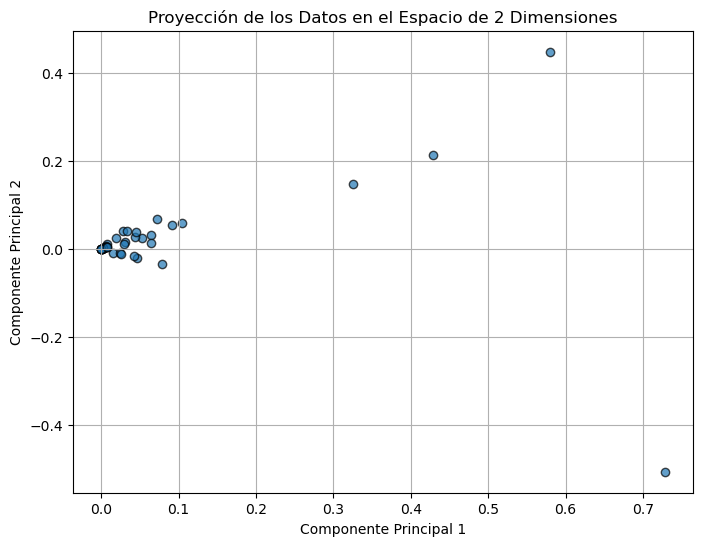

In [53]:
from funcionesTP2 import AInsumoProductoMultiRegional
#ZCriNic = generadorMatrizZ(data,"CRI","NIC")

#ZNicCri = generadorMatrizZ(data,"NIC","CRI")

I40 = np.eye(40)
A = ACriCri
Id_A = I40 - A
L_Id_A, U_Id_A, P_Id_A =calcularLU(Id_A)
IdA_inv = inversaLU(L_Id_A, U_Id_A, P_Id_A)
H = np.dot(A, IdA_inv)


I40 = np.eye(40)
v40 = np.ones(40)
E_40 = I40 - 1/40*(np.outer(v40,v40))

H_normalizada = np.dot(E_40, H)

C10 = np.dot(H_normalizada.T, H_normalizada) / 39

v1_H, lambda1_H = metodo_de_la_potencia(C10)
print("Primer autovalor:", lambda1_H)
print("Primer autovector:", v1_H)

C10_prima = C10 - lambda1_H * np.outer(v1_H, v1_H)
v2_H, lambda2_H = metodo_de_la_potencia(C10_prima)
print("Segundo autovalor:", lambda2_H)
print("Segundo autovector:", v2_H)

#Tambien vemos cuanta explicación representa las dos componentes principales que establecen el eje de coordenadas 
#de la proyección de datos en dos dimensiones

#porcentajeAval1 = lambda1_H 
#porcentaje Aval2 = 
#display()

H_proyectada = proyectar_datos(H, v1_H, v2_H)
graficar_proyeccion(H_proyectada)

0.5300768961880749

0.2881267200726941

<Axes: >

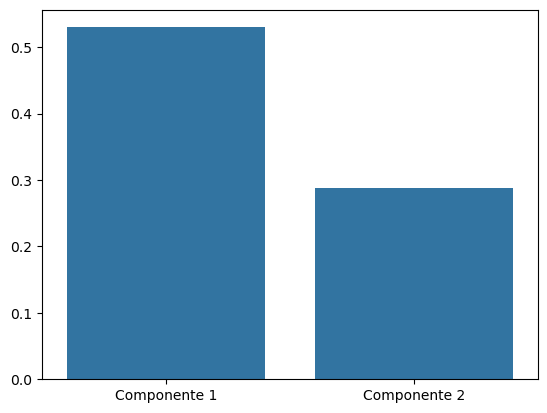

In [87]:
avals, avecs = np.linalg.eig(C10)
porcentajeAval1 = (lambda1_H / avals.sum())
display(porcentajeAval1)
porcentajeAval2 = (lambda2_H / avals.sum())
display(porcentajeAval2)

sns.barplot(x=["Componente 1", "Componente 2"], y = [porcentajeAval1,porcentajeAval2])

Podemos notar como con tan solo dos componentes principales de un conjunto de datos que posee información sobre 40 sectores económicos de un país 
es explicado en un aproximadamente un 80%, perdiendo al rededor del 20% de la información. Esto nos es útil para ver que tanto podemos analizar de la proyección de la matriz sobre las dos dimensiones que generan el el autovector 1 y el autovector 2.

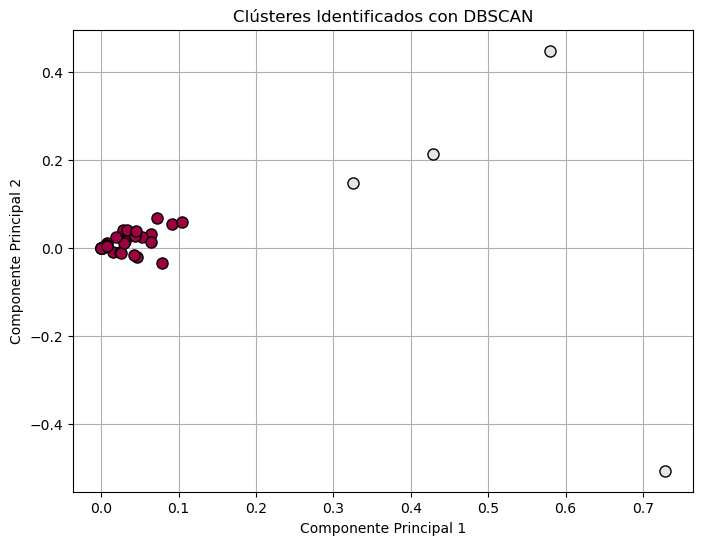

In [173]:
# Parámetros de DBSCAN
epsilon = 0.05 # Distancia máxima entre dos puntos para que se consideren vecinos
min_samples = 3  # Número mínimo de puntos para formar un clúster

# Ejecutamos DBSCAN en los datos proyectados
clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(H_proyectada)
labels = clustering.labels_

# Gráfico de los resultados del clustering
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color para ruido (puntos que no pertenecen a ningún clúster)
        col = [0, 0, 0, 0.1]

    class_member_mask = (labels == k)
    xy = H_proyectada[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Clústeres Identificados con DBSCAN')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

Observamos una gran mayoría de los datos proyectados sobre el espacio generado por la componente principal 1 y la componente principal 2
equidistan de una distancia menor a un pequeño radio establecido arbitrariamente de 0.05, a simple vista, podemos observar como hay 4 datos proyectados 
en dos dimensiones, alejados de un cluster generado por una gran cantidad de datos acumulados, 
los cuáles serían exactamente 36 datos, provenientes de los 40 sectores económicos sobre los cuáles estuvimos trabajando.


In [181]:
#Identificaremos aquellos que nos pertenecen al cluster mencionado:

def normasMaximas(h_proyectada):
    normas = []
    maximos = []
    for i in range(0,len(h_proyectada)):
        normas.append(np.linalg.norm(h_proyectada[i]))
    normas_sin_max = normas.copy()
    for k in range (0,4):
        indiceMax = np.argmax(normas_sin_max)
        maximos.append(np.max(normas_sin_max))
        normas_sin_max.remove(normas_sin_max[indiceMax])
    sectores = []
    for i in range(0,len(maximos)):
        for j in range(0,len(normas)):
            if maximos[i] == normas[j]:
                sectores.append(j+1)
    return sectores

print("Los sectores que no pertenecen al cluster observado en el graficos son los siguientes :", normasMaximas(H_proyectada))

Los sectores que no pertenecen al cluster observado en el graficos son los siguientes : [1, 39, 40, 38]


Por lo que, de los 40 sectores que explican la dinámica económica intrarregional de Costa Rica, los sectores 1, 38, 39 y 40 son los que aparentemente
tienen una gran diferencia en sus valores según la información que nos propicia las componotentes principales, la cual vimos que no es poca.

Entonces, lo que podemos decir es que aquellos datos de los sectores pertenecientes al único cluster observado en el gráfico, tienen una cercanía entre ellos al presentar valores cuantitativos similares en lo que significan como flujo de capitales, por lo que pueden tener una impulso económico similar al utilizar la matriz H. Ahora el resto de sectores, al parecer varían enormemente en cantidad respecto de los que se hallan en el cluster.

**Consigna 11**

In [ ]:
v3, lambda3 = metodo_de_la_potencia(A)

A_prima= A - lambda3 * np.outer(v3,v3)

v4, lambda4 = metodo_de_la_potencia(A_prima)

A_proyectada = proyectar_datos(A, v3,v4)

#sectores de A
distancias_A = np.sqrt(np.sum(A_proyectada**2, axis=1))
indice_mas_cercano_A = np.argmin(distancias_A)
indice_mas_lejano_A = np.argmax(distancias_A)

#sectores de H
distancias_H = np.sqrt(np.sum(H_proyectada**2, axis=1))
indice_mas_cercano_H = np.argmin(distancias_H)
indice_mas_lejano_H = np.argmax(distancias_H)


#Grafico de producción más cercana y más lejana
plt.plot(A[indice_mas_cercano_A],label="Sector más cercano de A")
plt.plot(H[indice_mas_cercano_H],label="Sector más cercano de H")
plt.legend()
plt.title("Producción más Cercana de A y H")
plt.show()

plt.plot(A[indice_mas_lejano_A], label="A sector más lejano")
plt.plot(H[indice_mas_lejano_H], label="H sector más lejano")
plt.legend()
plt.title("Producción más lejano de A y H")
plt.show()
